# K-Means sample problem

### *index*

* **The introduction of the K-Means Algorithm** : We are going to study K-Means which is one of the representative clustering algorithms.

* **How to implement K-Means with Numpy** : We will implement K-Means with Numpy.
* **How to implement K-Means with Scikit-Learn** : We will implement K-Means with Scikit-Learn.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## [ 1. The introduction of the K-Means Algorithm  ]

K-Means is an algorithm to group given data to the number K of clusters.<br/>
Data will be grouped by minimizing the gap of the variance of distances between the center point of the cluster and each data.

This time, We are going to understand how the K-Means algorithm works through the example.

In [2]:
# load sample data
import seaborn as sns

iris = sns.load_dataset('iris')

Visualize example data.

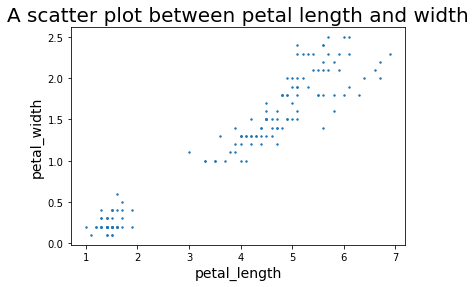

<Figure size 720x576 with 0 Axes>

In [3]:
# Visualize loaded example data.
iris.plot(kind="scatter",x="petal_length",y="petal_width", s=2)

# Set the title of graph and labels of axis X and Y
plt.title("A scatter plot between petal length and width", fontsize=20)
plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)

# Set the size of graph and print it
plt.figure(figsize=(10,8))
plt.show()

If we divide data into 2 clusters, it seems like they would be grouped as the small cluster at the left side and the large cluster at the right side. <br/>

However, how does the clustering actually work? And how to the central points that bind the clusters together?

In this case, we can **set two center points at random locations**,<br/>
and **cluster them by calculating distances between those points and data**.<br/>
After that, if we **repeat moving those center points until we find the smallest averages of clustered data**, <br/>
we can find the center point for each cluster.

We call this way of clustering K-Means.

## [ 2. How to implement K-Means with Numpy ]

This is the progress of the K-Means algorithm.

1. Set two center points at random locations
2. Calculate distances between center points and data
3. Assign each data to the cluster of the nearest center point
4. Calculate averages of each clustered data and set them as new locations of center points.
5. Repeat 2~4 until all data of clusters don't change

Firstly, we will write codes by following this order step-by-step,
and we will merge them into one code which contains the entire progress.

Before we start, we need to import the Numpy package to implement K-Means with it. <br/>
After it is imported, convert the data to the Numpy array.

In [4]:
import numpy as np

np_iris = np.array(iris)
np_iris = np_iris[:, 2:4]
np_iris = np_iris.astype(np.float)

## 1. Numpy Code Writing - Step by step

### (1) Set two center points at random locations
The K-means algorithm starts from generating the number K of points (two here) in random locations of the data space. <br/>However, even I've mention random locations, those 2 random points must be placed near the dataset. <br/>Therefore, we will figure out the range of the dataset first, and choose 2 random value to create 2 new points.

We can use the np.random method of Numpy to extract random values based on <br/>the probability distribution between the minimum and maximum values of the data. <br/><br/>
For instance, if we want to make chances same to randomly extract the axis X value in the dataset, <br/>we can set the probability distribution to a continuous uniform distribution(uniform) and sample it.

In [5]:
min_x = np_iris[:, 0].min()  # The minumum value of axis x
max_x = np_iris[:, 0].max()  # The maximum value of axis x
np.random.uniform(low=min_x,high=max_x) #Extract the random axis x value by using a continuous uniform distribution

5.723664832090694

We can get the number K of values in ranges of the axis x and y through this way.

In [6]:
k = 2 # The number of points

# Get minimum and maximum values from axis x and y
min_x = np_iris[:, 0].min()
max_x = np_iris[:, 0].max() 
min_y = np_iris[:, 1].min()
max_y = np_iris[:, 1].max() 

# Extract the number K of x and y values and pair them, and add them to the centroids array. 
center_x = np.random.uniform(low=min_x, high=max_x, size=k)
center_y = np.random.uniform(low=min_y, high=max_y, size=k)

centroids = np.stack([center_x,center_y],axis=-1)

Random center points will be scattered like this.

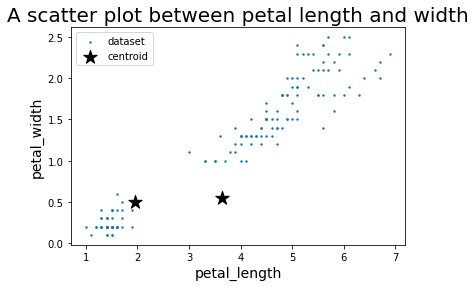

<Figure size 720x576 with 0 Axes>

In [7]:
# Visualize the example data set and center points
plt.title("A scatter plot between petal length and width", fontsize=20)
plt.scatter(np_iris[:, 0], np_iris[:, 1], label='dataset', s=2)
plt.scatter(centroids[:,0],centroids[:,1], c="black",
            s=200, label="centroid", marker='*')

plt.xlabel("petal_length", fontsize=14)
plt.ylabel("petal_width", fontsize=14)

plt.legend()
plt.figure(figsize=(10,8))
plt.show()

### (2) Calculate distances between center points and data
In this step, we will get distances between all center points and each data.<br/>
This is the mathematical expression to get distances.

$$
point1 = (x_1,y_1), point2 = (x_2,y_2)\mbox{일 때}\\
distance\_between\_point1\_and\_point2 = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
$$

In [8]:
# The list to save distances between all center points and each data
dists = []

for center in centroids:
    # Calculate distances from each center point to each data. 
    dist_from_center = []
    for point in zip(iris["petal_length"], iris["petal_width"]):
        # Distance calculation
        dist = np.sqrt(((center - point)**2).sum())
        dist_from_center.append(dist)
    dists.append(dist_from_center)

dists = np.array(dists)
dists

array([[2.27150043, 2.27150043, 2.3704016 , 2.17269985, 2.27150043,
        1.95069948, 2.25856274, 2.17269985, 2.27150043, 2.19071521,
        2.17269985, 2.07401424, 2.28873823, 2.58371659, 2.46939129,
        2.15021106, 2.34980568, 2.25856274, 1.96057057, 2.15917023,
        1.97546083, 2.15021106, 2.66759676, 1.94592393, 1.77883849,
        2.07401424, 2.05044337, 2.17269985, 2.27150043, 2.07401424,
        2.07401424, 2.15021106, 2.19071521, 2.27150043, 2.17269985,
        2.46939129, 2.3704016 , 2.28873823, 2.3704016 , 2.17269985,
        2.35800662, 2.35800662, 2.3704016 , 2.04624069, 1.75129932,
        2.25856274, 2.07401424, 2.27150043, 2.17269985, 2.27150043,
        1.35884372, 1.28297579, 1.57786838, 0.83587783, 1.35164245,
        1.14159709, 1.4930637 , 0.57283878, 1.21825874, 0.89396465,
        0.4795468 , 1.10602693, 0.57837471, 1.35884372, 0.75832052,
        1.14180776, 1.28297579, 0.64453684, 1.28297579, 0.61237109,
        1.70673156, 0.83587783, 1.57786838, 1.24

In [9]:
dists.shape    # The shape of dists array

(2, 150)

In [10]:
dists[1,32] # The distance from the index 1 center point to the index 32 data

0.6005074325649431

We can abbreviate the code we've just seen by using reshape and broadcasting of Numpy. 

In [11]:
diff_mat = (centroids.reshape(-1,1,2) - np_iris.reshape(1,-1,2))
dists = np.sqrt((diff_mat**2).sum(axis=-1))
dists.shape

(2, 150)

### (3) Assign each data to the cluster of the nearest center point

We can use the argmin method to assign each data to the nearest cluster.

In [12]:
# assign each data to the cluster that the nearest center point is located.
cluster_per_point = dists.argmin(axis=0)
cluster_per_point

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### (4) Calculate averages of each clustered data and set them as new locations of center points.

In [13]:
for i in range(k):
    # Get a group of points of the current cluster
    target_point = np_iris[cluster_per_point==i]
    
    # Set a average of the current cluster as the new location of center point
    centroids[i] = target_point.mean(axis=0)

### (5) Repeat 2~4 until all data of clusters don't change

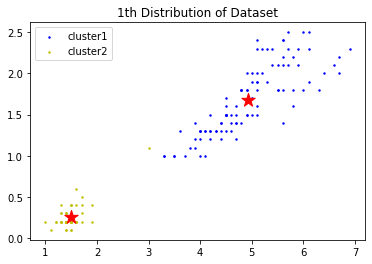

In [14]:
# Get the number of data
num_data = np_iris.shape[0]

# Make the cluster table which has the size of the number of data.
cluster_per_point = np.ones((num_data))

# The variable to save the count of a repetition
counter = 0
while True:
    # Save data of the cluster table before the update
    prev_cluster_per_point = cluster_per_point
    
    # (2) Calculate distances between center points and data
    diff_mat = (centroids.reshape(-1,1,2) - np_iris.reshape(1,-1,2))
    dists = np.sqrt((diff_mat**2).sum(axis=-1))
    
    # (3) Assign each data to the cluster of the nearest center point
    cluster_per_point = dists.argmin(axis=0)

    # (4) Calculate averages of each clustered data and set them as new locations of center points.
    for i in range(k):
        centroids[i] = np_iris[cluster_per_point==i].mean(axis=0)
        
    # If the unupdated cluster table and the updated one are same, finish the task.
    if np.all(prev_cluster_per_point == cluster_per_point):
        break
        
    # Add count 1
    counter += 1
    
    # Visualize clustered data
    plt.title("{}th Distribution of Dataset".format(counter))

    # Visualize data which has the same index with the index for circulation
    for idx, color in enumerate(['b','y']):
        mask = (cluster_per_point==idx)
        plt.scatter(np_iris[mask,0],np_iris[mask,1],
                    label=f'cluster{idx+1}', c=color, s=2)
        
    plt.scatter(centroids[:,0],centroids[:,1],
                c='r', s=200, marker='*')
        
    plt.legend()
    plt.show()

## 2.  Numpy Code Writing - All-in-one

In this part, we are going to merge every step into one code for the K-Means algorithm.

In [15]:
def cluster_kmeans(dataset, k):    
    # (1) Set two center points at random locations
    min_x = dataset[:,0].min()
    max_x = dataset[:,0].max() 
    min_y = dataset[:,1].min()
    max_y = dataset[:,1].max() 

    center_x = np.random.uniform(low=min_x, high=max_x, size=k)
    center_y = np.random.uniform(low=min_y, high=max_y, size=k)
    centroids = np.stack([center_x,center_y],axis=-1)
    
    # Repeat processes from (2) to (5)
    num_data = dataset.shape[0]  # Get the number of data
    cluster_per_point = np.ones((num_data)) # Make the cluster table which has the size of the number of data.

    # The variable to save the count of repetition
    counter = 0
    while True:
        prev_cluster_per_point = cluster_per_point
        
        # (2) Calculate distances between center points and data
        diff_mat = (centroids.reshape(-1,1,2) - dataset.reshape(1,-1,2))
        dists = np.sqrt((diff_mat**2).sum(axis=-1))
        # (3) Assign each data to the cluster of the nearest center point
        cluster_per_point = dists.argmin(axis=0)
        
        # (4) Calculate averages of each clustered data and set them as new locations of center points.
        for i in range(k):
            centroids[i] = dataset[cluster_per_point==i].mean(axis=0)

        # (5) Repeat 2~4 until all data of clusters don't change
        if np.all(prev_cluster_per_point == cluster_per_point):
            break

        # Add count 1
        counter += 1
        
        # Visualize clustered data
        plt.title("{}th Distribution of Dataset".format(counter))
        
        for idx, color in enumerate(['b','y']):
            # Visualize data which has the same index with the index for circulation
            mask = (cluster_per_point==idx)
            plt.scatter(dataset[mask,0],dataset[mask,1],
                        label=f'cluster{idx+1}', c=color, s=2)
            
        plt.scatter(centroids[:,0],centroids[:,1],
                    c='r', s=200, marker='*')
        
        plt.legend()
        plt.show()
    
    return centroids

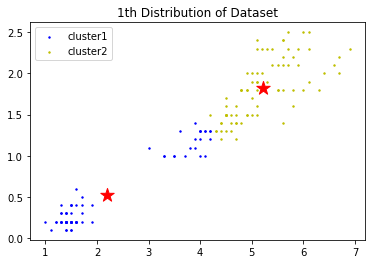

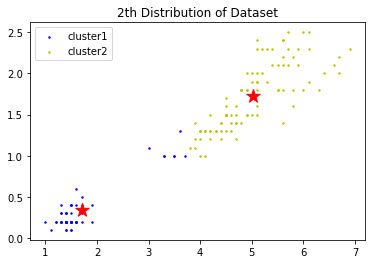

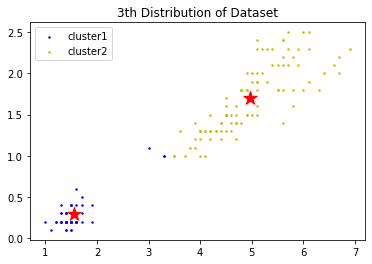

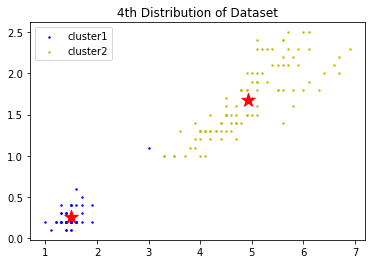

array([[1.49215686, 0.2627451 ],
       [4.92525253, 1.68181818]])

In [16]:
cluster_kmeans(np_iris,2)

We implemented the K-Means algorithm and succeed in clustering by calculating center points of clusters.

## [ 3. How to implement K-Means with Scikit-Learn ]

We can also easily implement the K-Means algorithm by using the KMeans class from Scikit-Learn.

In [17]:
from sklearn.cluster import KMeans

We should send the number K to the n_clusters parameter when we generate a KMeans instance. <br/>After that, we can train the KMeans instance by passing data to the fit method to implement the K-Means algorithm

In [18]:
# Make data to train the K-Means instance.
sk_iris = list(zip(iris['petal_length'],iris['petal_width']))

kmeans = KMeans(n_clusters=2)
kmeans.fit(sk_iris)

KMeans(n_clusters=2)

We can check how was the clustering progressed through printing the labels_ attribute

In [19]:
print("Cluster labels:\n{}".format(kmeans.labels_))

Cluster labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


We will visualize clustered data by using kmeans.labels_

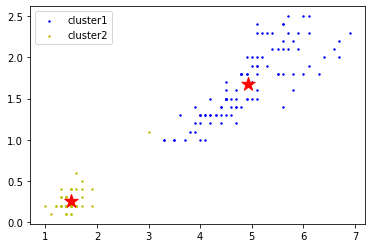

In [20]:
for idx, color in enumerate(['b','y']):
    # Visualize data which has the same index with the index for circulation
    mask = (kmeans.labels_==idx)
    plt.scatter(iris['petal_length'][mask],iris['petal_width'][mask],
                label=f'cluster{idx+1}', c=color, s=2)
    
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
            c='r', s=200, marker='*')

plt.legend()
plt.show()

We can check the data clustering that is based on center points is achieved by the K-Means algorithm that we've implemented with Scikit-Learn.